

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [5]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [6]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [7]:
df.describe()

ine_code    new_cases          PCR        TestAc       activos  \
count  19374.000000  6427.000000  5256.000000    674.000000   2323.000000   
mean      26.498245    96.560137   125.758232  17885.130564   1104.065433   
std       15.009382   183.575529   255.989698  31105.031498   1573.550276   
min        1.000000    -2.000000    -1.000000      0.000000     -2.000000   
25%       13.000000     7.000000     9.000000      7.000000    210.000000   
50%       26.000000    37.000000    52.000000    318.000000    585.000000   
75%       39.750000    97.000000   136.000000   4958.000000   1235.000000   
max       52.000000  2332.000000  3968.000000  85530.000000  14617.000000   

       hospitalized  hospitalized_accumulated  hospitalized_new  \
count  13501.000000                828.000000        825.000000   
mean     198.321754              15638.949275        955.224242   
std      693.664727              24733.232872       1420.171780   
min        0.000000                  3.000000         -3.000000   
25%       18.000000                286.000000        206.000000   
50%       68.000000               1200.500000        295.000000   
75%      172.000000              41195.250000       1149.000000   
max    15227.000000              78735.000000       6503.000000   

       intensive_care      deceased  cases_accumulated  cases_accumulated_PCR  \
count    13364.000000  14850.000000        9560.000000           10478.000000   
mean        29.928614    698.475556       12198.140586           14668.788223   
std         83.898309   1974.687124       27294.410306           43376.407795   
min          0.000000      0.000000           0.000000               0.000000   
25%          3.000000    117.000000        1243.750000            1832.000000   
50%         10.000000    260.000000        3318.000000            4053.500000   
75%         29.000000    481.000000       11710.500000            9585.000000   
max       1528.000000  14472.000000      300276.000000          427758.000000   

          recovered  deceased_hosp_eus     num_casos  num_casos_prueba_pcr  \
count   9491.000000         585.000000  19292.000000          19292.000000   
mean    4052.783464         391.068376    101.840919             89.024259   
std     7837.921524         243.192336    291.105387            266.200094   
min        0.000000         130.000000      0.000000              0.000000   
25%      548.000000         219.000000      1.000000              1.000000   
50%     1513.000000         285.000000     20.000000             18.000000   
75%     3381.000000         594.000000     93.000000             82.000000   
max    83474.000000        1000.000000   6750.000000           6735.000000   

       num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
count              19292.000000         19292.000000            19292.000000   
mean                   0.244039            12.307640                0.157786   
std                    1.436959            63.333492                1.743308   
min                    0.000000             0.000000                0.000000   
25%                    0.000000             0.000000                0.000000   
50%                    0.000000             0.000000                0.000000   
75%                    0.000000             1.000000                0.000000   
max                   32.000000          2752.000000               73.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  19292.000000  1.937400e+04        9560.000000   
mean                       0.107195  9.040624e+05        1137.695510   
std                        1.287469  1.176098e+06        1375.058801   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.167980e+05         178.995000   
50%                        0.000000  5.810780e+05         548.085000   
75%                        0.000000  1.030437e+06      

y un muestreo de valores y de algunas columnas de interés:

In [8]:
df.head()

date                province  ine_code                  ccaa  \
0  2019-12-11             Palmas, Las        35              Canarias   
1  2019-12-11  Santa Cruz de Tenerife        38              Canarias   
2  2020-01-01                Albacete         2  Castilla - La Mancha   
3  2020-01-01        Alicante/Alacant         3  Comunitat Valenciana   
4  2020-01-01                 Almería         4             Andalucía   

   new_cases  PCR  TestAc  activos  hospitalized  hospitalized_accumulated  \
0        NaN  NaN     NaN     -1.0           NaN                       NaN   
1        NaN  NaN     NaN      0.0           NaN                       NaN   
2        NaN  NaN     NaN      NaN           NaN                       NaN   
3        NaN  NaN     NaN      NaN           NaN                       NaN   
4        NaN  NaN     NaN      NaN           NaN                       NaN   

   hospitalized_new  intensive_care  deceased  cases_accumulated  \
0               NaN             NaN       0.0                0.0   
1               NaN             NaN       0.0                0.0   
2               NaN             NaN       NaN                NaN   
3               NaN             NaN       NaN                NaN   
4               NaN             NaN       NaN                NaN   

   cases_accumulated_PCR  recovered  deceased_hosp_eus  num_casos  \
0                    0.0        1.0                NaN        NaN   
1                    0.0        0.0                NaN        NaN   
2                    NaN        NaN                NaN        0.0   
3                    NaN        NaN                NaN        0.0   
4                    NaN        NaN                NaN        1.0   

   num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_ag  \
0                   NaN                       NaN                  NaN   
1                   NaN                       NaN                  NaN   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  0.0   
4                   1.0                       0.0                  0.0   

   num_casos_prueba_elisa  num_casos_prueba_desconocida  poblacion  \
0                     NaN                           NaN    1120406   
1                     NaN                           NaN    1032983   
2                     0.0                           0.0     388167   
3                     0.0                           0.0    1858683   
4                     0.0                           0.0     716820   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                0.0                         NaN                   0.0   
1                0.0                         NaN                   0.0   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN       

In [9]:
df.tail()

date           province  ine_code                  ccaa  \
19369  2021-01-07              Soria        42       Castilla y León   
19370  2021-01-07             Toledo        45  Castilla - La Mancha   
19371  2021-01-07  Valencia/València        46  Comunitat Valenciana   
19372  2021-01-07         Valladolid        47       Castilla y León   
19373  2021-01-07             Zamora        49       Castilla y León   

       new_cases    PCR  TestAc  activos  hospitalized  \
19369       21.0    NaN     NaN      NaN          12.0   
19370        NaN  294.0     NaN      NaN         254.0   
19371     2033.0    NaN     NaN      NaN        1174.0   
19372      143.0    NaN     NaN      NaN         105.0   
19373       35.0    NaN     NaN      NaN          44.0   

       hospitalized_accumulated  hospitalized_new  intensive_care  deceased  \
19369                       NaN               NaN             6.0     181.0   
19370                       NaN               NaN            25.0    1537.0   
19371                       NaN               NaN           186.0    1679.0   
19372                       NaN               NaN            39.0     827.0   
19373                       NaN               NaN             6.0     345.0   

       cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
19369                NaN                 6003.0      762.0                NaN   
19370                NaN                40696.0        NaN                NaN   
19371            89290.0                    NaN    83474.0                NaN   
19372                NaN                32498.0     4786.0                NaN   
19373                NaN                 9013.0     1420.0                NaN   

       num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
19369        NaN                   NaN                       NaN   
19370        NaN                   NaN                       NaN   
19371        NaN                   NaN                       NaN   
19372        NaN                   NaN                       NaN   
19373        NaN                   NaN                       NaN   

       num_casos_prueba_ag  num_casos_prueba_elisa  \
19369                  NaN                     NaN   
19370                  NaN                     NaN   
19371                  NaN                     NaN   
19372                  NaN                     NaN   
19373                  NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
19369                           NaN      88636                NaN   
19370                           NaN     694844                NaN   
19371                           NaN    2565124            3480.92   
19372                           NaN     519546                NaN   
19373                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
19369                        6.77                204.21   
19370                        3.60                221.20   
19371                        7.25                 65.45   
19372                        7.51                159.18   
19373                        3.48                199.95   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
19369                    13.54           NaN          NaN             183.0   
19370                    36.55           NaN          NaN               NaN   
19371                    45.77       12981.0       6719.0               NaN   
19372                    20.21           NaN          NaN            1347.0   
19373                    25.50           NaN          NaN             281.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
19369            120.0         21.0              17.1             21.0   
19370              NaN          NaN               NaN            294.0   
19371              NaN       2033.0            1345.9              N

In [10]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'hospitalized_accumulated',
       'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated',
       'cases_accumulated_PCR', 'recovered', 'deceased_hosp_eus', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_ag', 'num_casos_prueba_elisa',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source'

In [13]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

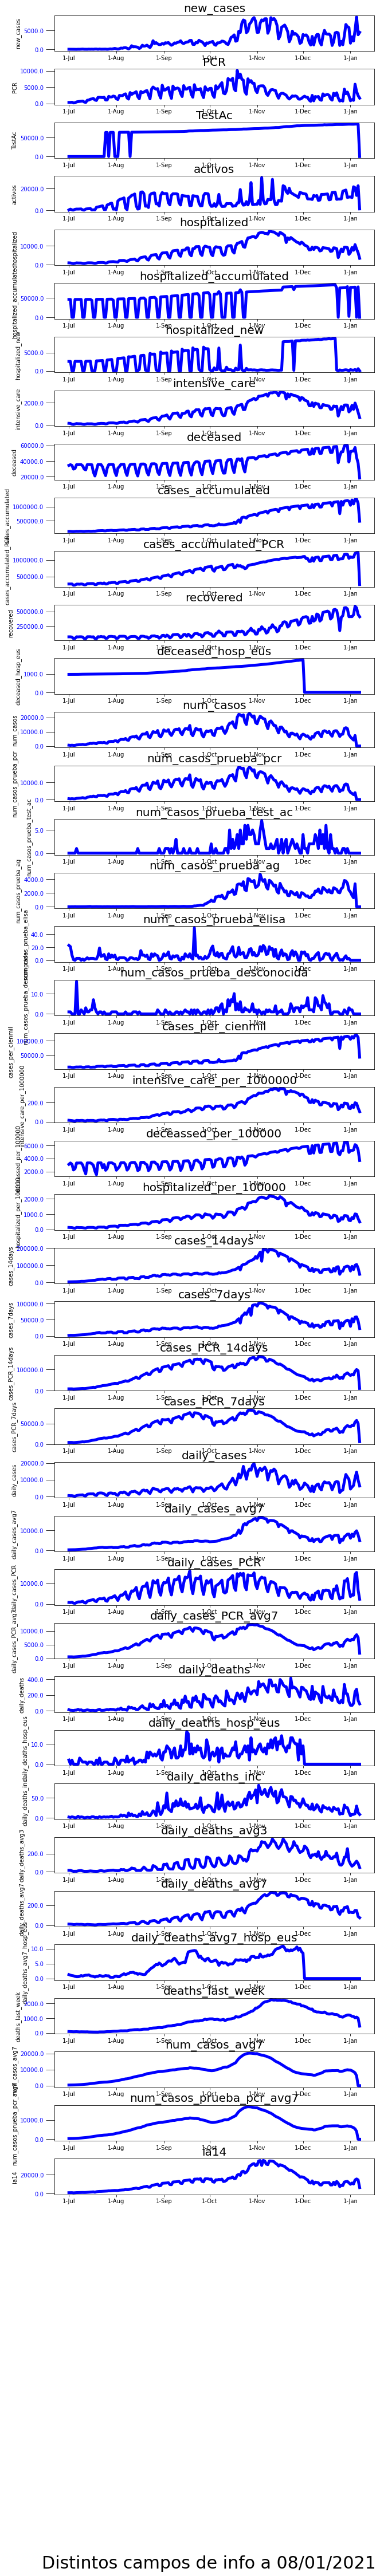

In [14]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [15]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'lightblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
casos_nuevos_paisvasco = 'casos_nuevos_paisvasco'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
pais_vasco=['Bizkaia','Araba/Álava','Gipuzkoa']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in pais_vasco:
    datos.loc[datos['province']==provincia,casos_nuevos_paisvasco]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']   
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


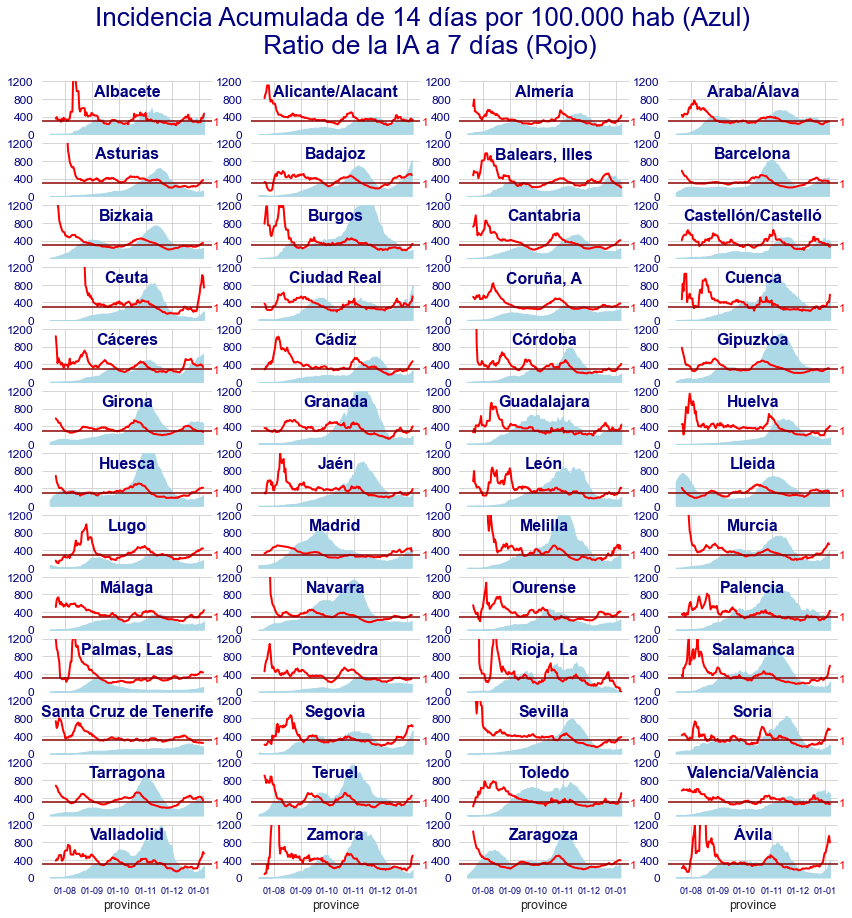

In [16]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1200)
    ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    ax1.grid(True)
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [17]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[AI].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

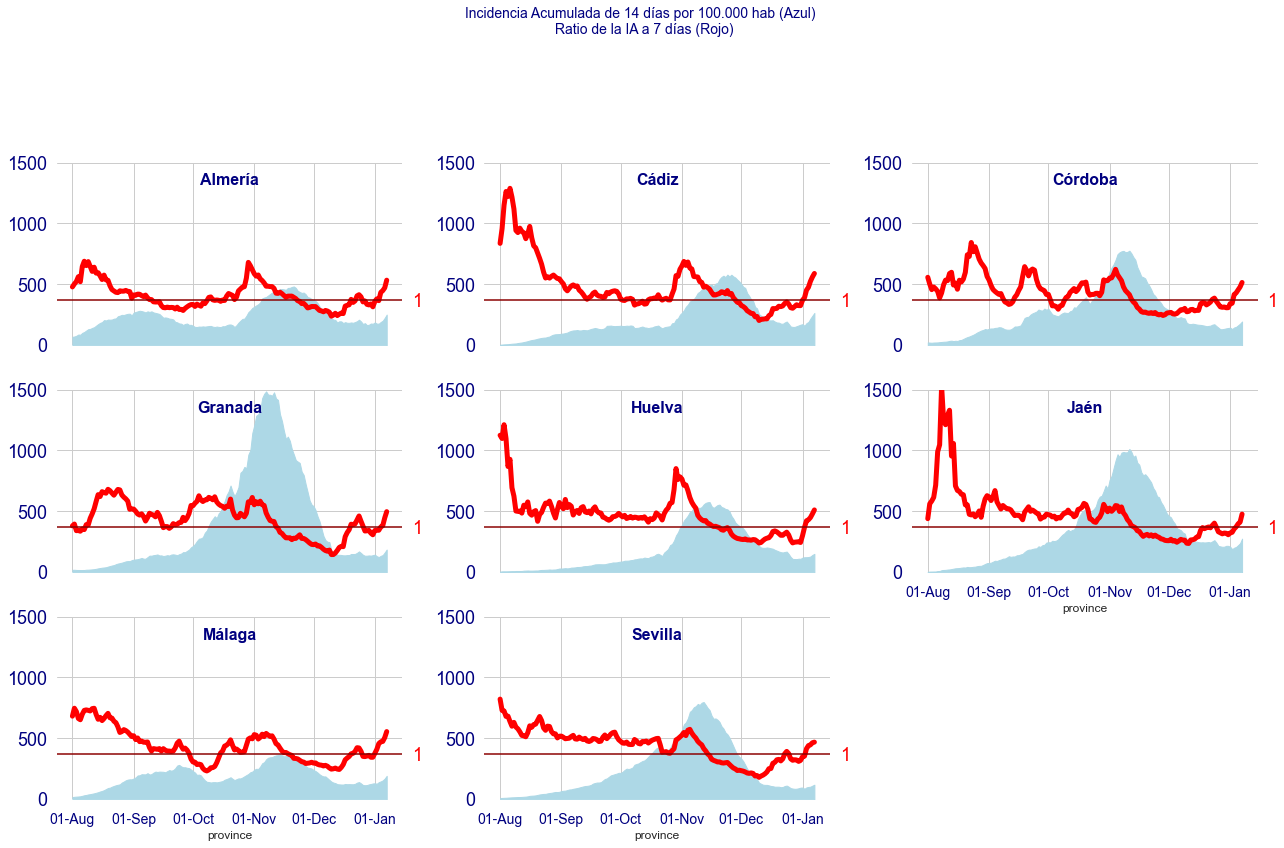

In [18]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

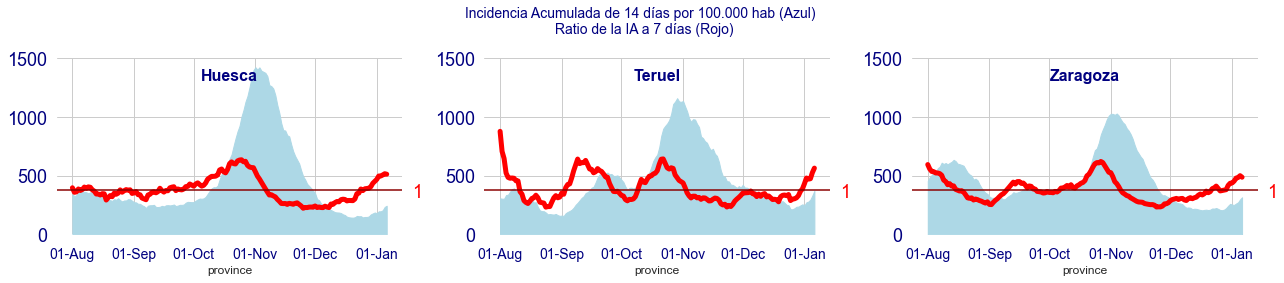

In [19]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

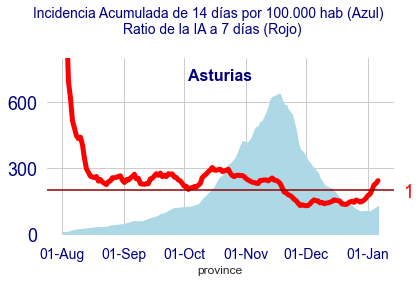

In [20]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

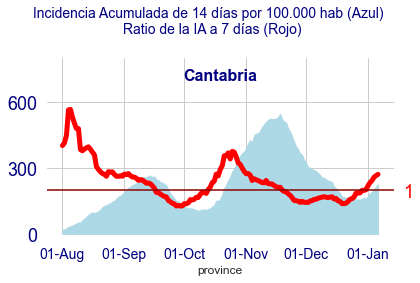

In [21]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

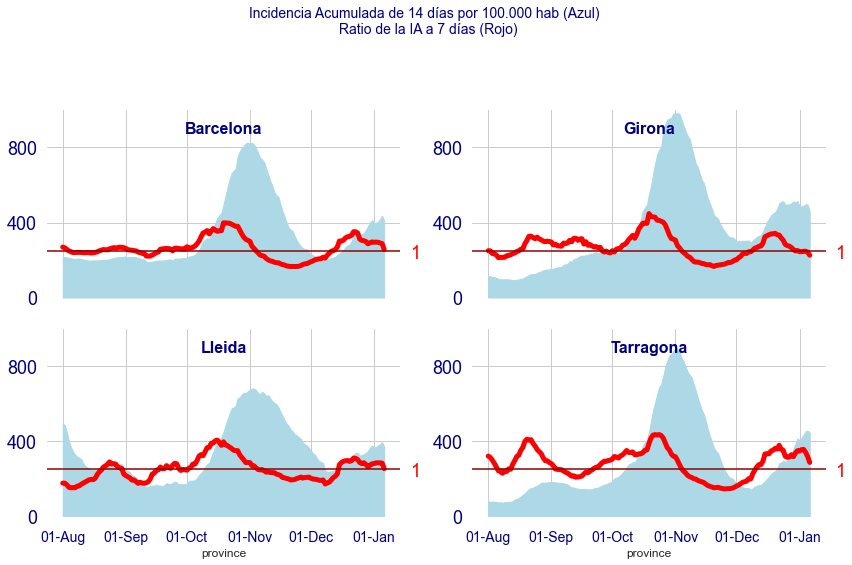

In [22]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

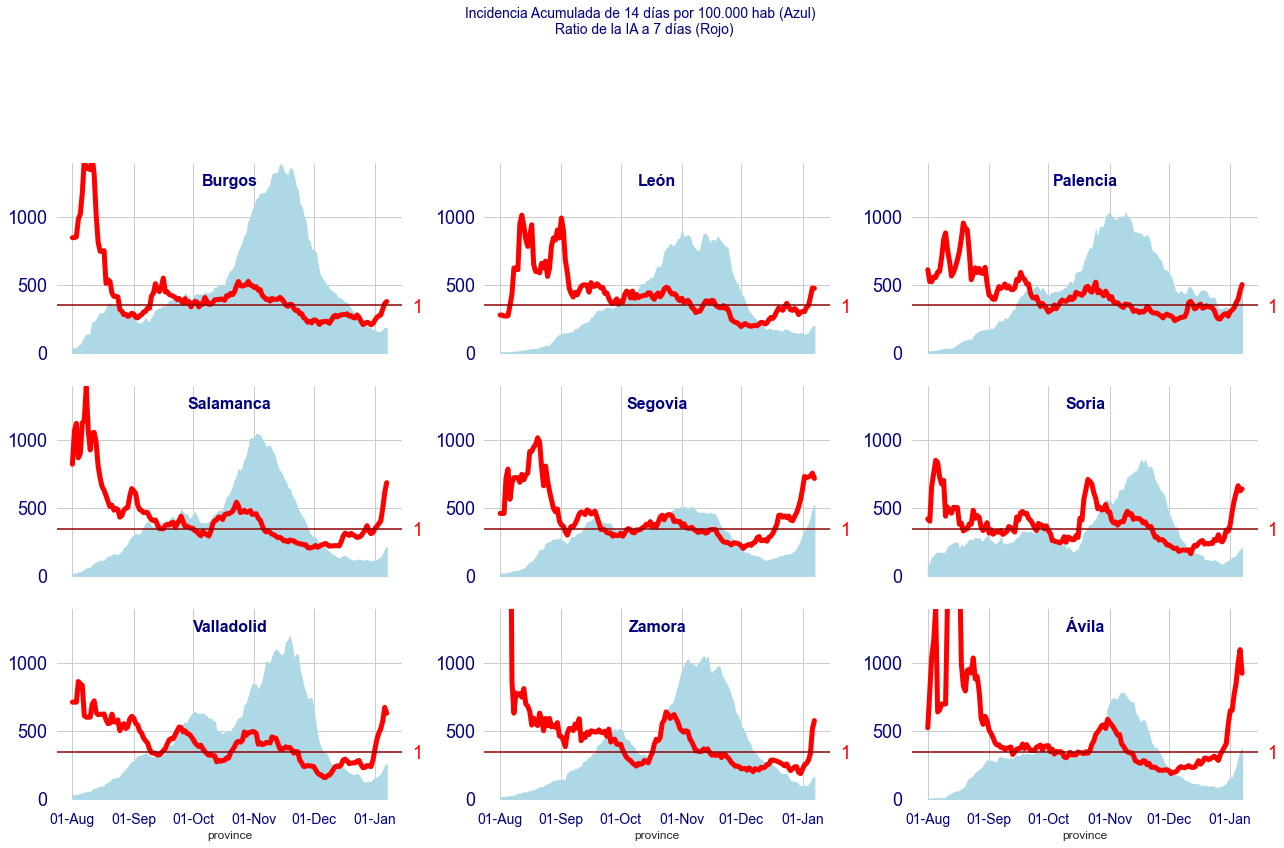

In [23]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

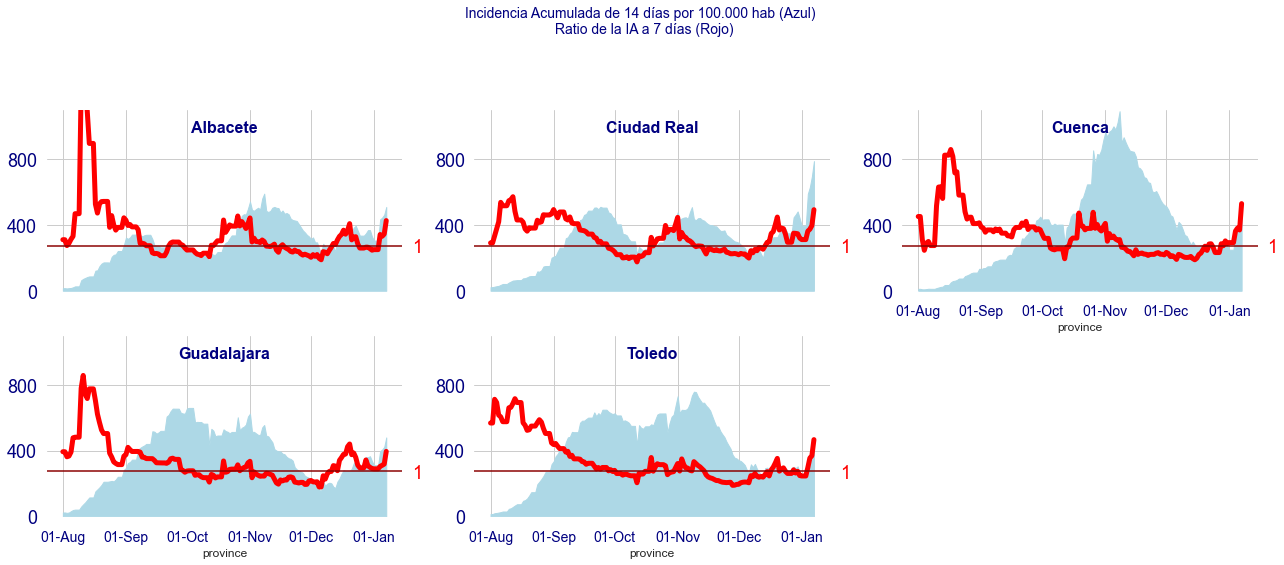

In [24]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

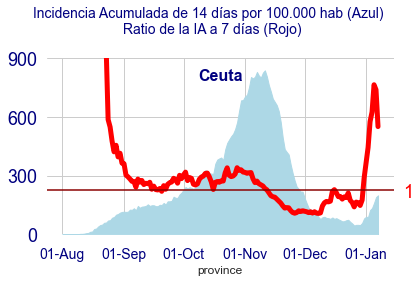

In [25]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

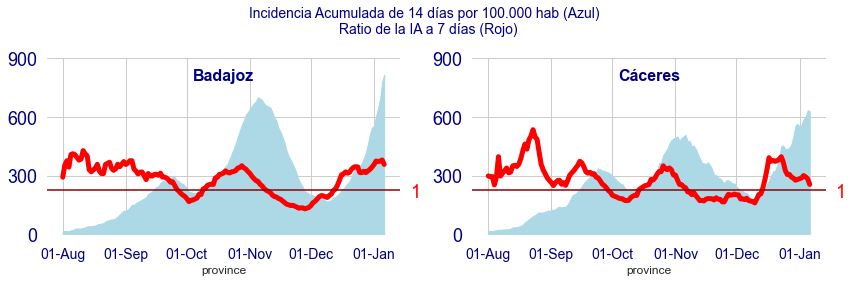

In [26]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

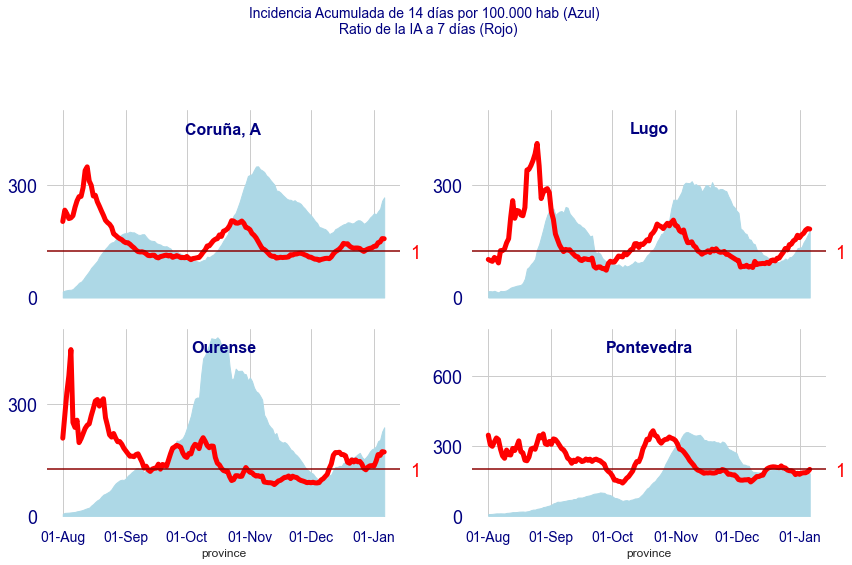

In [27]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

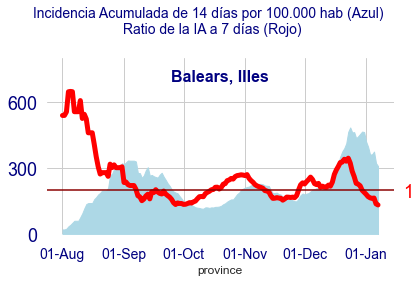

In [28]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

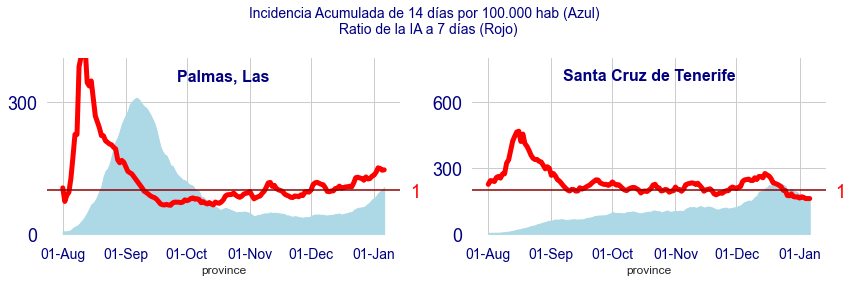

In [29]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

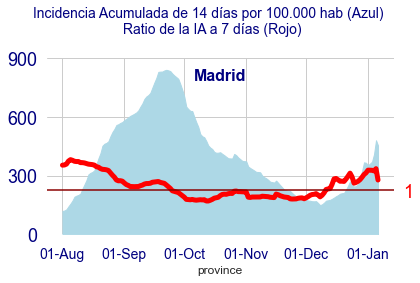

In [30]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

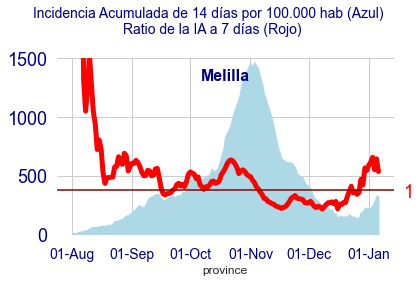

In [31]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

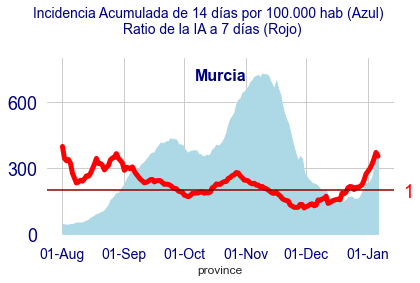

In [32]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

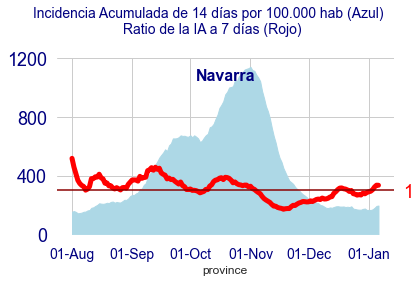

In [33]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

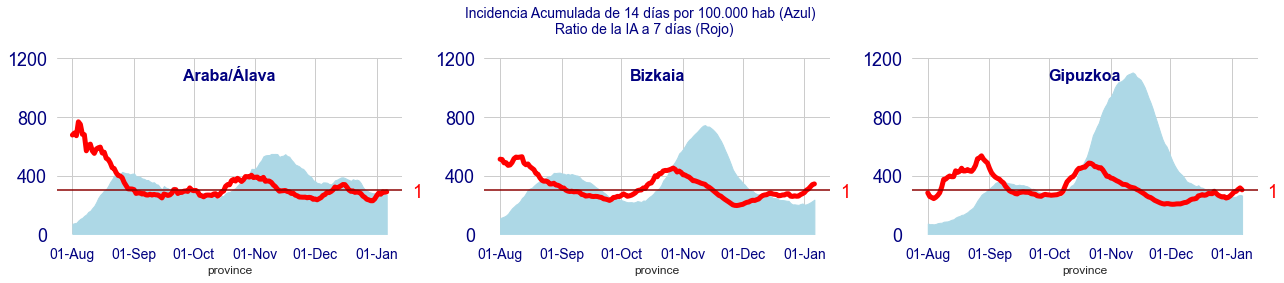

In [34]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

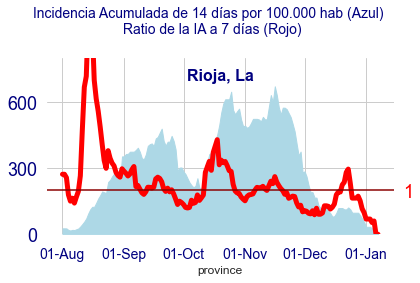

In [35]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

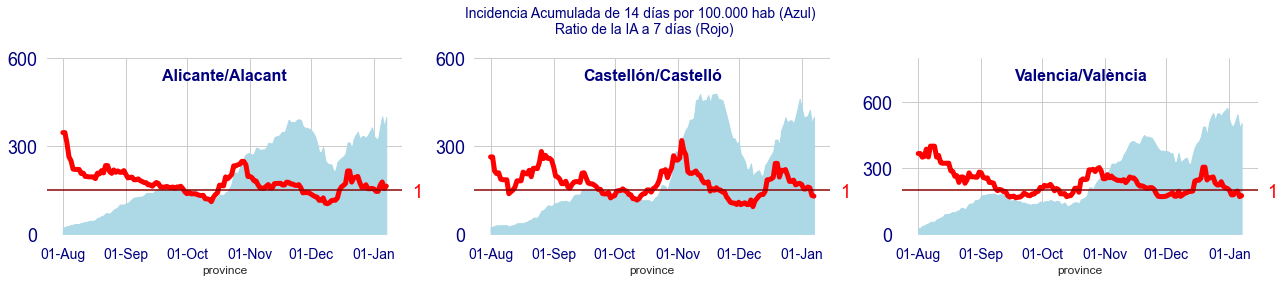

In [36]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [37]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

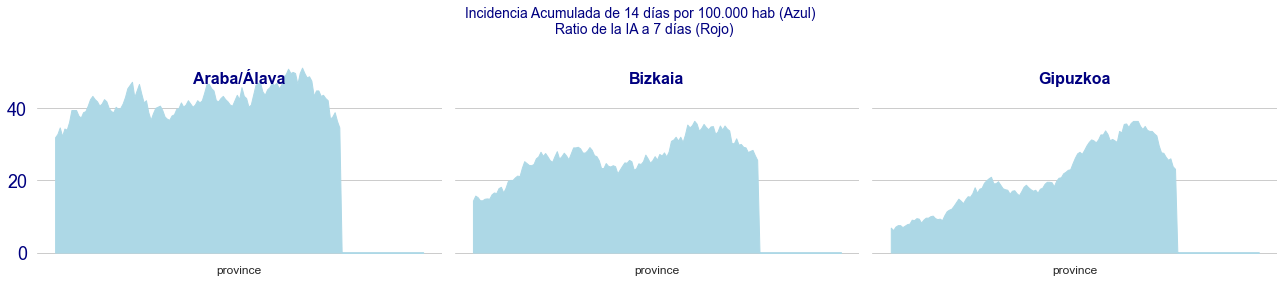

In [38]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

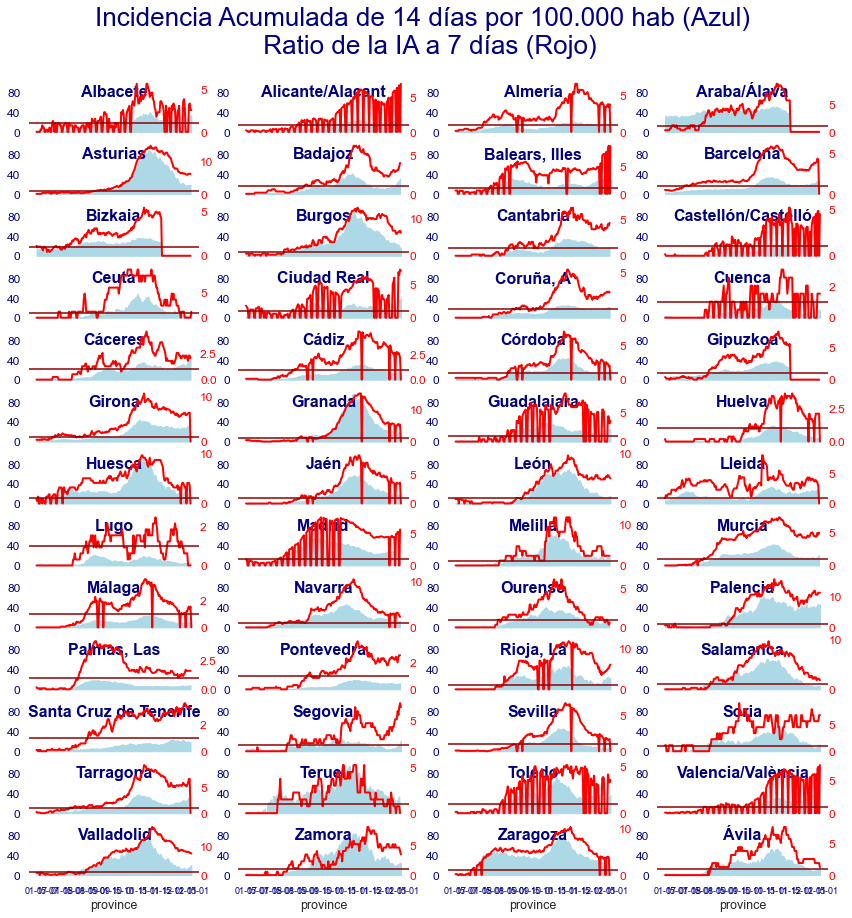

In [39]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [40]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=5.0, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (columnas, y_max)
    
    
    def grafica(x, color, label):
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        #metemos este cambio para que no intente imprimirla y se va de escala el gráfico
        df_datos.loc[:,clave_ratio]=df_datos.loc[:,clave_ratio].apply(lambda x:min(x,3.0))
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        #ax1.set_xlim(180,220)
        
        #ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

1 2


<Figure size 1080x1080 with 0 Axes>

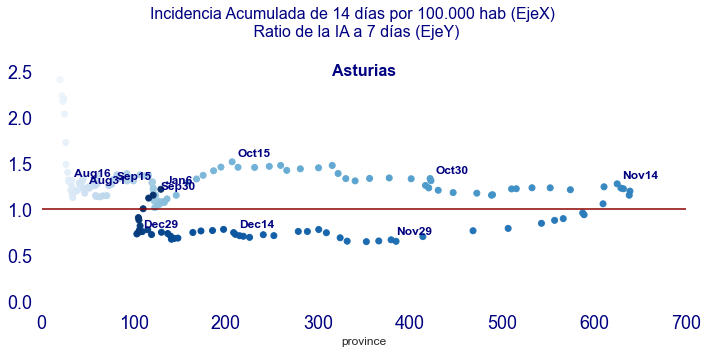

In [41]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

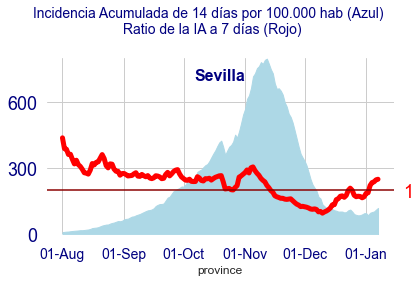

In [42]:
grafico_IA14_ratio(datos,campos,['Sevilla'],'sevilla')

<Figure size 720x360 with 0 Axes>

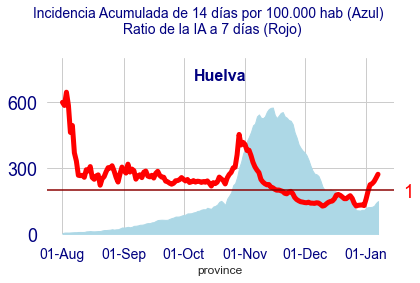

In [43]:
grafico_IA14_ratio(datos,campos,['Huelva'],'huelva')

<Figure size 720x360 with 0 Axes>

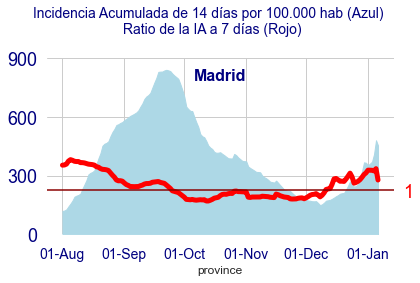

In [44]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

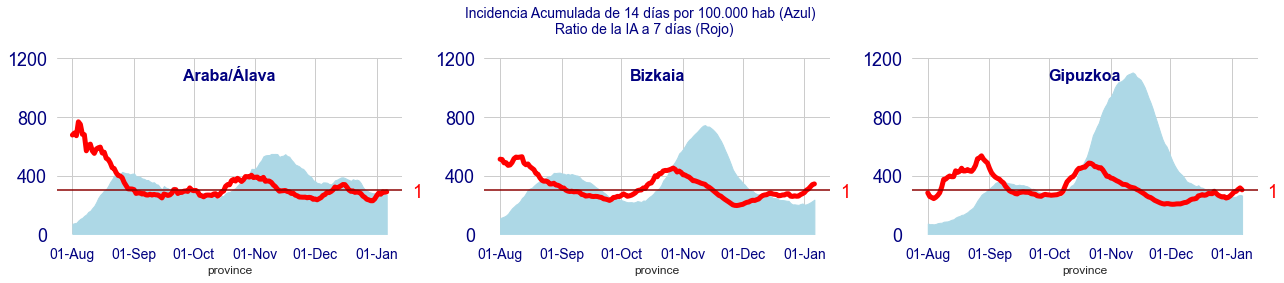

In [45]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

3 3.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

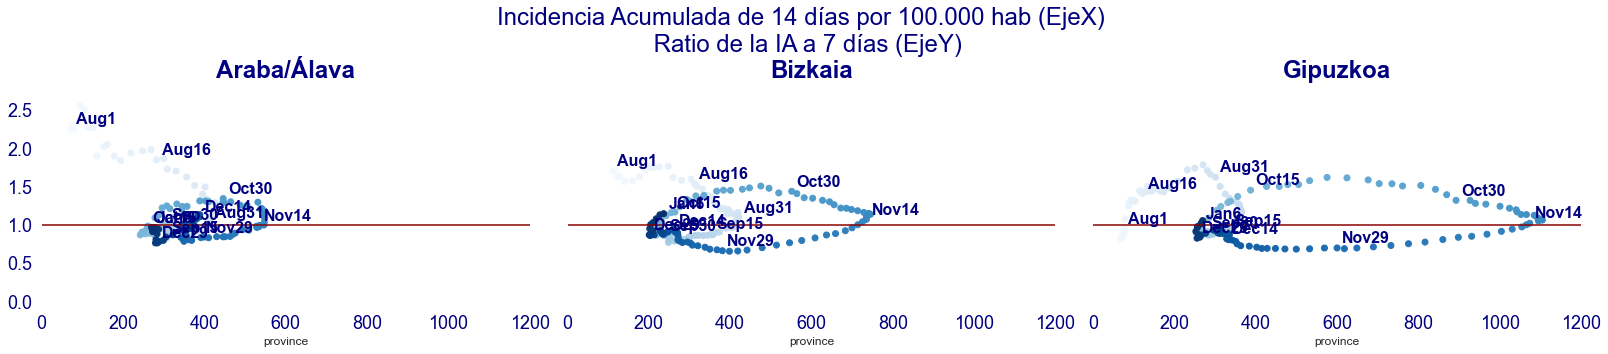

In [46]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

1 2.0


<Figure size 1080x1080 with 0 Axes>

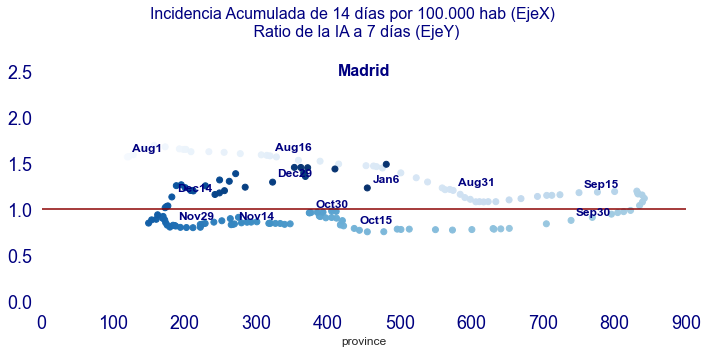

In [47]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

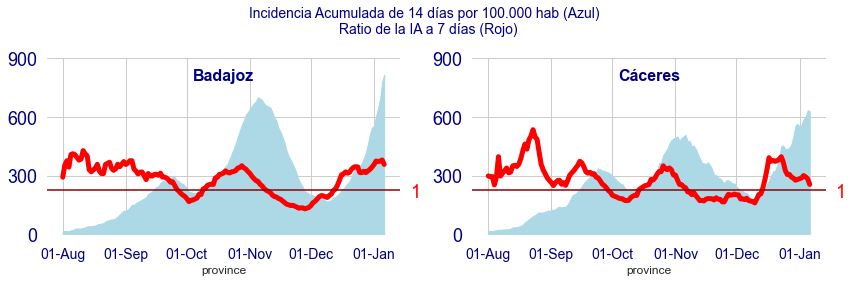

In [48]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2 2.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

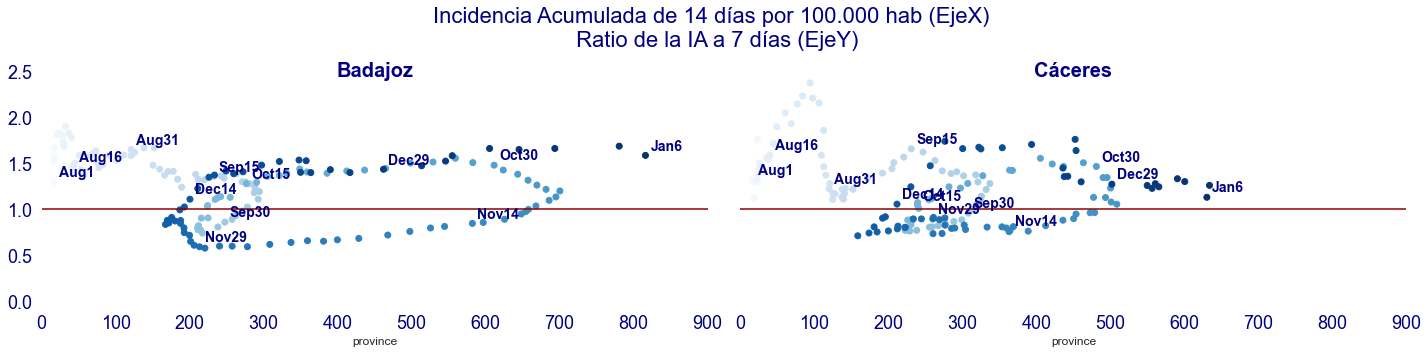

In [49]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

1 2.0


<Figure size 1080x1080 with 0 Axes>

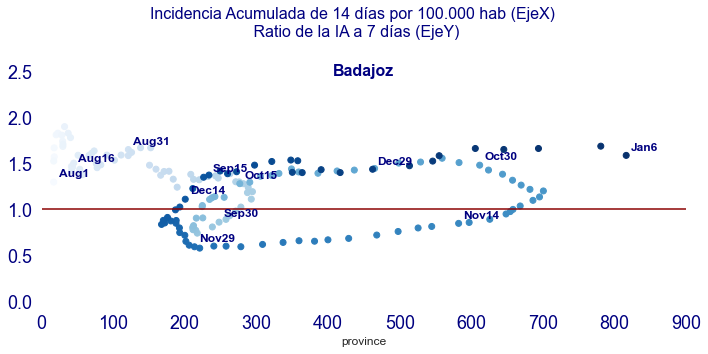

In [50]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

1 2.5


<Figure size 1080x1080 with 0 Axes>

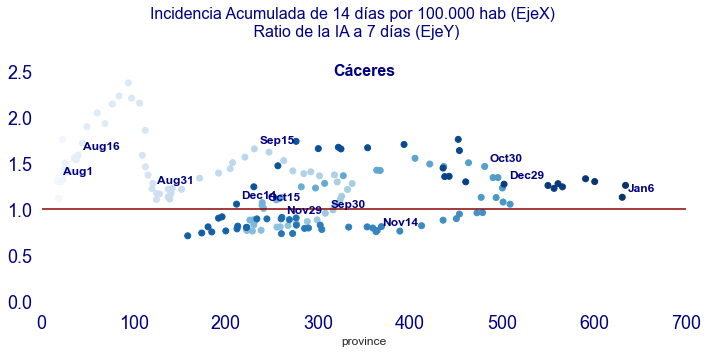

In [51]:
grafico_IA14_ratio_vs(datos,campos,['Cáceres'],'Caceres')

1 3.0


<Figure size 1080x1080 with 0 Axes>

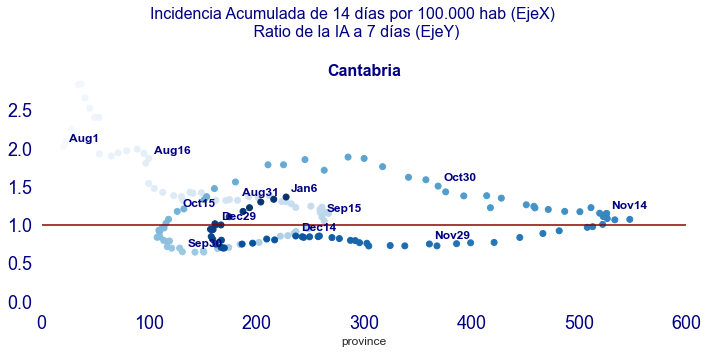

In [52]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [53]:
datos.loc[datos['province']=='Madrid']

date province  ine_code                  ccaa  new_cases  PCR  \
9496  2020-07-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9548  2020-07-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9600  2020-07-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9652  2020-07-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9704  2020-07-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9756  2020-07-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9808  2020-07-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9860  2020-07-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9912  2020-07-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9964  2020-07-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10016 2020-07-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10068 2020-07-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10120 2020-07-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10172 2020-07-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10224 2020-07-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10276 2020-07-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10328 2020-07-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10380 2020-07-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10432 2020-07-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10484 2020-07-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10536 2020-07-21   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10588 2020-07-22   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10640 2020-07-23   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10692 2020-07-24   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10744 2020-07-25   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10796 2020-07-26   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10848 2020-07-27   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10900 2020-07-28   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10952 2020-07-29   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11004 2020-07-30   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11056 2020-07-31   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11108 2020-08-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11160 2020-08-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11212 2020-08-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11264 2020-08-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11316 2020-08-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11368 2020-08-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11420 2020-08-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11472 2020-08-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11524 2020-08-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11576 2020-08-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11628 2020-08-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11680 2020-08-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11732 2020-08-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11784 2020-08-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11836 2020-08-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11888 2020-08-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11940 2020-08-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11992 2020-08-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12044 2020-08-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12096 2020-08-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12148 20

1 2.0


<Figure size 1080x1080 with 0 Axes>

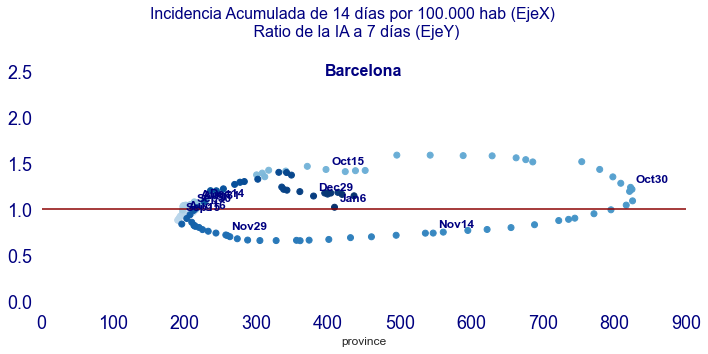

In [54]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona'],'barcelona')

2 2.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

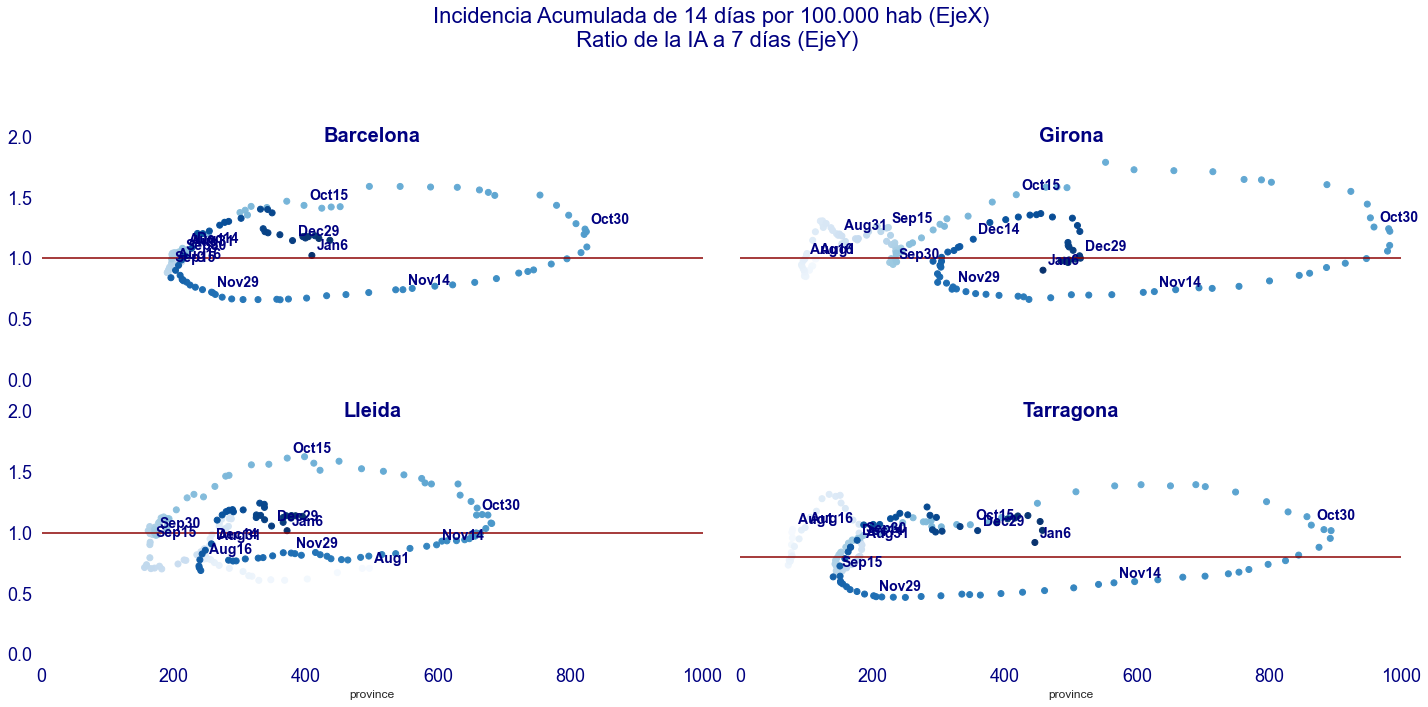

In [55]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

1 2


<Figure size 1080x1080 with 0 Axes>

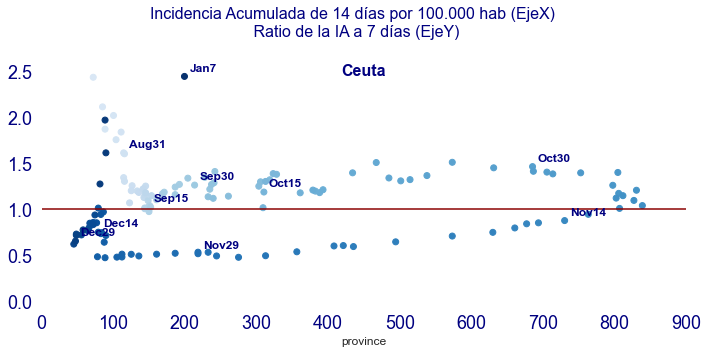

In [56]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

1 2


<Figure size 1080x1080 with 0 Axes>

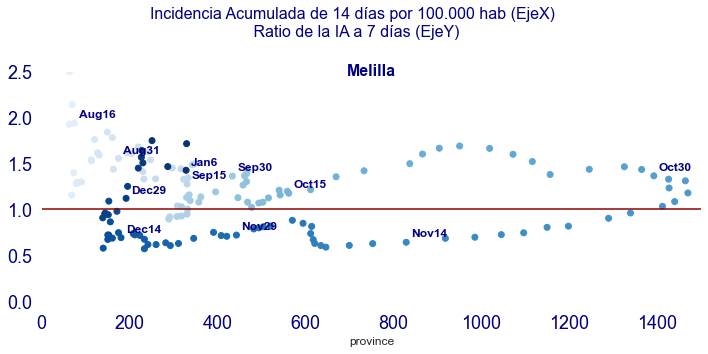

In [57]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

1 2.0


<Figure size 1080x1080 with 0 Axes>

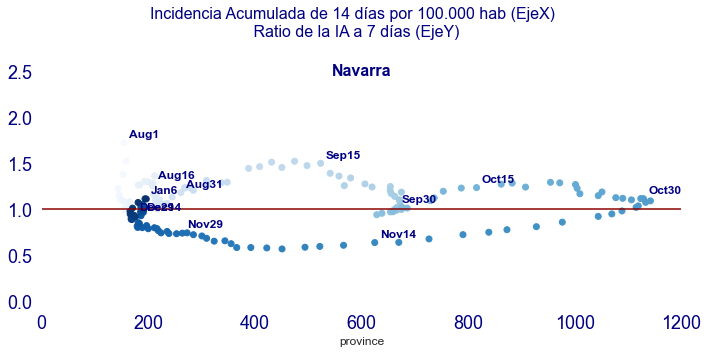

In [58]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

1 2


<Figure size 1080x1080 with 0 Axes>

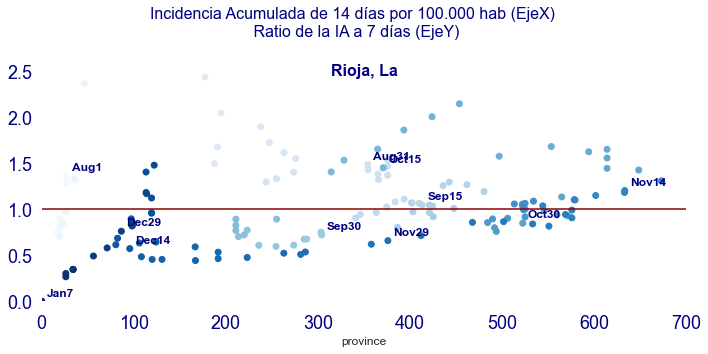

In [59]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

1 2.5


<Figure size 1080x1080 with 0 Axes>

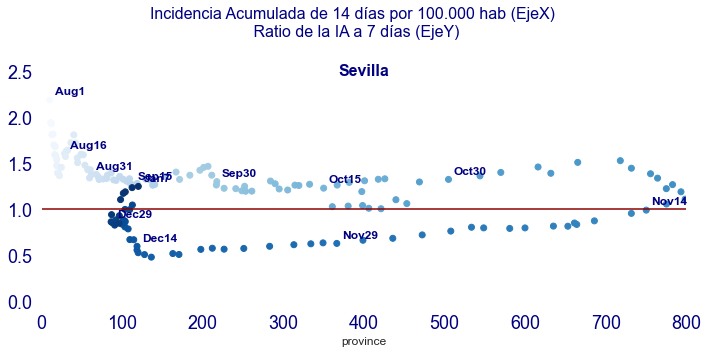

In [60]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

1 2


<Figure size 1080x1080 with 0 Axes>

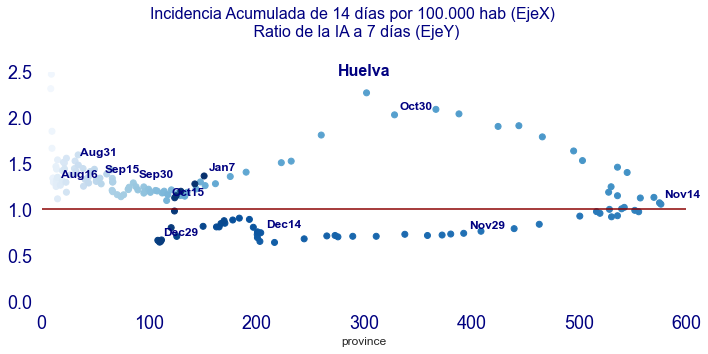

In [61]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

3 2.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

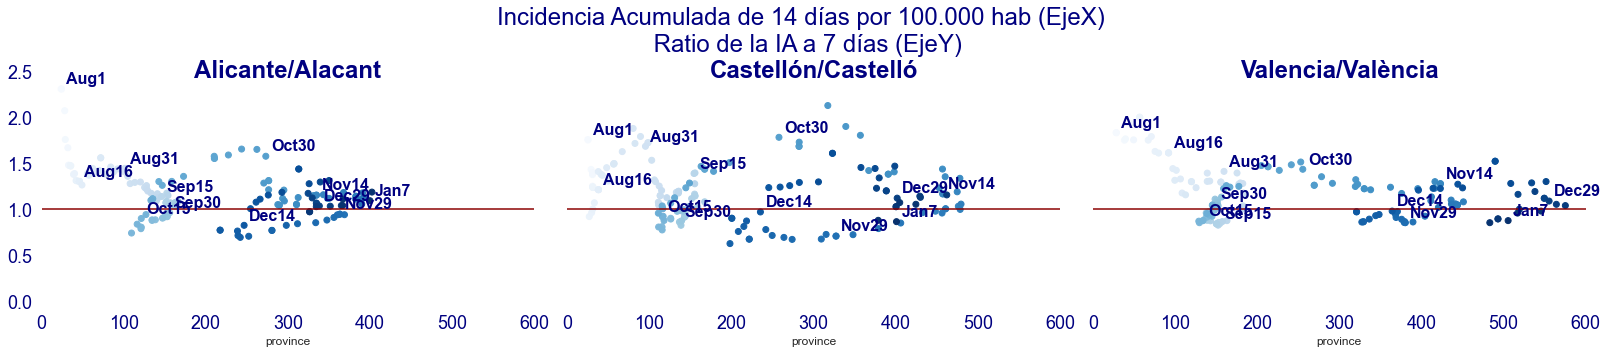

In [62]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

3 2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

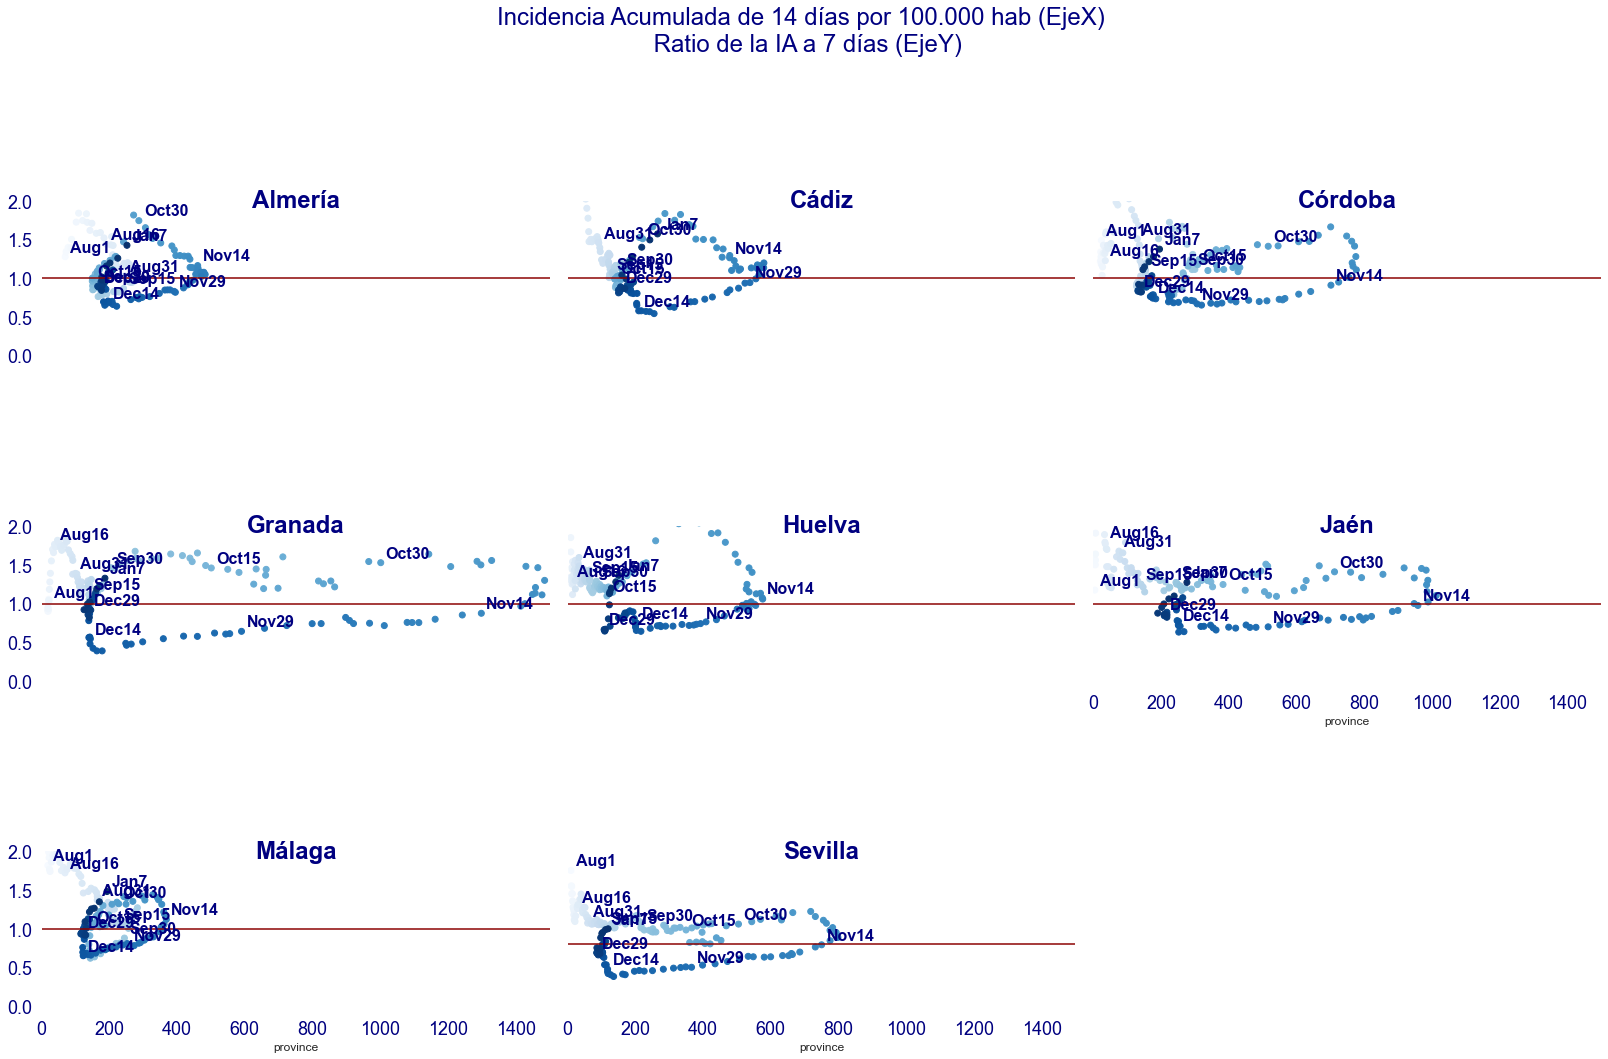

In [63]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')